# Hyper-parameter Investigation

Hyper-parameters to be investigated: <br>
1. Number of hidden layers <br>
2. Number of nodes per layer <br>
3. The type of activation function used in each layer <br>
4. The learning rate <br>
5. The number of epochs for training <br>

Baseline parameters used for the network (unless otherwise specified):
- Leaky ReLU activation function for hidden layers
- Sigmoid activation function for the output layer 
- A single training cycle consists of 1000 epochs
- Default learning rate is 0.01

## Setup

In [1]:
import time
import funcs
import network as net
import numpy as np
import pandas as pd
from network import layer
from typing import Iterable, Tuple
import matplotlib.pyplot as plt

**Step 1:** Get the data 

In [10]:
# The input data (each row is an instance)
data = pd.read_csv("data_banknote_authentication.txt",
    sep=",",
    header=None,
)
x = data.iloc[:, 0:3].to_numpy()
y = data.iloc[:, 4].to_numpy()

**Step 2:** Method for initiating and training the network

In [3]:
def train_nn(nr_layers, nr_nodes):
    layers = []
    for i in range(nr_layers):
        layers.append(net.layer(nr_nodes))
    layers.append(net.layer(1, funcs.sigmoid)) # add the output layer with sigmoid as activation func
    
    n = net.network(x, layers, y, alpha=0.01)
    
    start_time = time.time()
    acc, loss  = n.learn(1000)
    t_time = time.time() - start_time # training time

    return acc, loss, t_time

## 1. Number of hidden layers

Investigate the accuracy of neural networks with varying numbers of hidden layers (0 to 10). To isolate the effect of the number of hidden layers on a network's performance, each layer has a single nodes. Performance metrics used to evaluate the model are - average accuracy, loss and training time calculated form 10 trial runs of the model.

**Step 1:** Train the network and collect the performance metrics

In [4]:
accuracy, loss, t_time = [], [], []

# for each set of hyperparameters investigated, re-train the network 10 times
for i in range (10):
    a_0, l_0, t_0 = train_nn(0, 1)
    a_2, l_2, t_2 = train_nn(2, 1)
    a_4, l_4, t_4 = train_nn(4, 1)
    a_6, l_6, t_6 = train_nn(6, 1)
    a_8, l_8, t_8 = train_nn(8, 1)
    a_10, l_10, t_10 = train_nn(10, 1)
    accuracy.append([a_0, a_2, a_4, a_6, a_8, a_10])
    loss.append([l_0, l_2, l_4, l_6, l_8, l_10])
    t_time.append([t_0, t_2, t_4, t_6, t_8, t_10])

**Step 2:** Find the averages of performance from the 10 runs

In [5]:
acc_avg = np.mean(accuracy, axis=1)
loss_avg = np.mean(loss, axis=1)
time_avg = np.mean(t_time, axis=0)

**Step 3:** Plot the performance metrics 

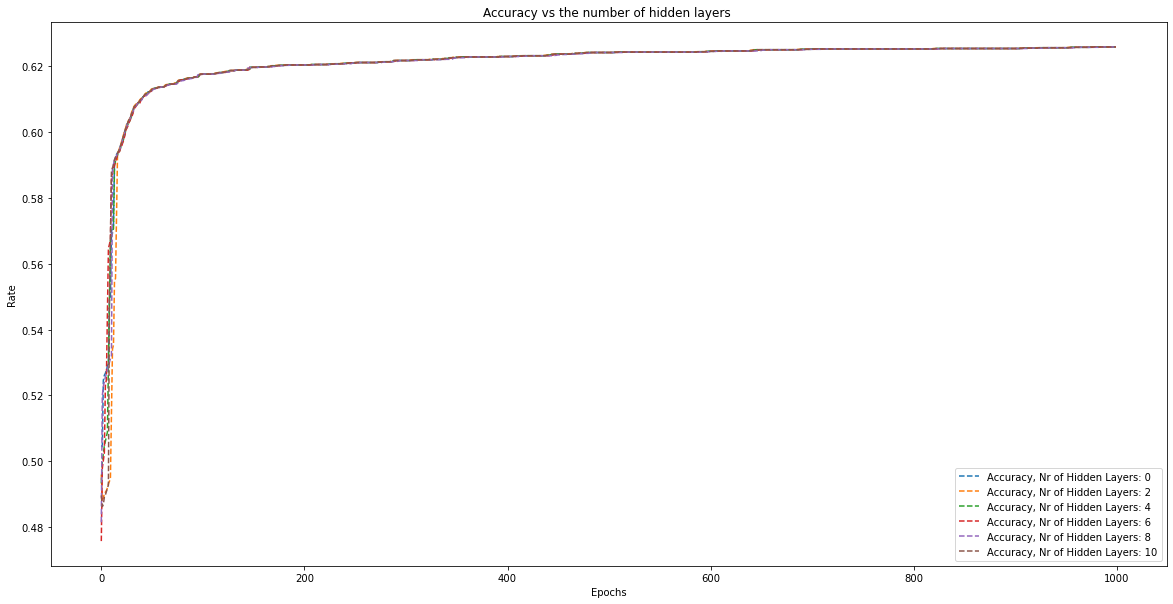

In [6]:
plt.figure(figsize=(20, 10))
for i in range(len(accuracy[0])):
    plt.plot(acc_avg[i], linestyle = 'dashed', label = 'Accuracy, Nr of Hidden Layers: {}'.format(2*i))
    
plt.xlabel('Epochs')
plt.ylabel('Rate')
plt.title('Accuracy vs the number of hidden layers ')
plt.legend(loc=4)
plt.show()

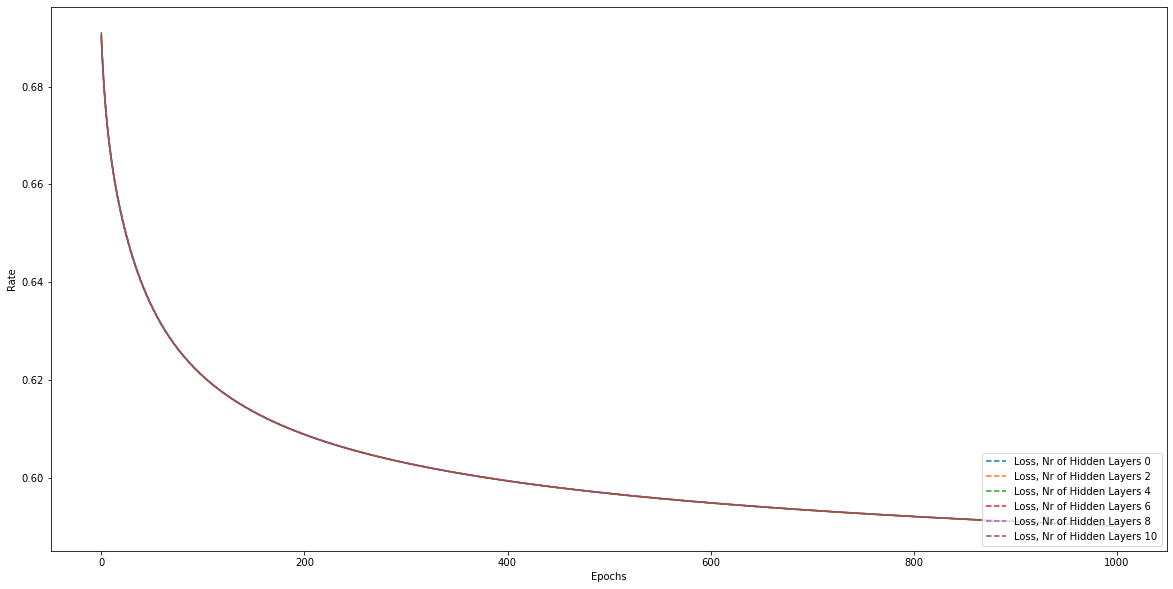

In [7]:
plt.figure(figsize=(20, 10))
for i in range(len(accuracy[0])):   
    plt.plot(loss_avg[i], linestyle = 'dashed', label = 'Loss, Nr of Hidden Layers {}'.format(2*i))
    
plt.xlabel('Epochs')
plt.ylabel('Rate')
plt.legend(loc=4)
plt.show()

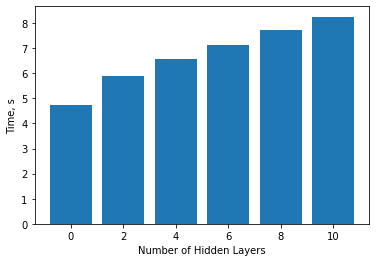

In [8]:
x = ['0', '2', '4', '6', '8', '10']
plt.bar(x, time_avg)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Time, s')
plt.show()

## 2. Number of nodes per layer

Next we investigate the effect of the number of nodes per layer on a network's performance. In the previous experiment networks with 2, 4, and 6 hidden layers performed best (**perhaps this is not the best way to reason about this, the accuracy in the previous section changes dramatically from run to run, as well if the activation is changed**), therefore these architectures will be used as baseline and the number of nodes altered (exclude networks with single node per layer as this scenario was explored in the previous section).  

#### 2.1. Train the model

In [11]:
accuracy_nodes, loss_nodes, t_time_nodes = [], [], []

# for each set of hyperparameters investigated, re-train the network a set number of times
for i in range (10):
    a_22, l_22, t_22 = train_nn(2, 2)
    a_23, l_23, t_23 = train_nn(2, 3)
    a_24, l_24, t_24 = train_nn(2, 4)
    a_42, l_42, t_42 = train_nn(4, 2)
    a_43, l_43, t_43 = train_nn(4, 3)
    a_44, l_44, t_44 = train_nn(4, 4)
    a_62, l_62, t_62 = train_nn(6, 2)
    a_63, l_63, t_63 = train_nn(6, 3)
    a_64, l_64, t_64 = train_nn(6, 4)
    accuracy_nodes.append([a_22, a_23, a_24, a_42, a_43, a_44, a_62, a_63, a_64])
    loss_nodes.append([l_22, l_23, l_24, l_42, l_43, l_44, l_62, l_63, l_64])
    t_time_nodes.append([t_22, t_23, t_24, t_42, t_43, t_44, t_62, t_63, t_64])

#### 2.2. Find the averages

In [12]:
acc_nodes_avg = np.mean(accuracy_nodes, axis=1)
loss_nodes_avg = np.mean(loss_nodes, axis=1)
time_nodes_avg = np.mean(t_time_nodes, axis=0)

#### 2.3. Plot the performance metrics

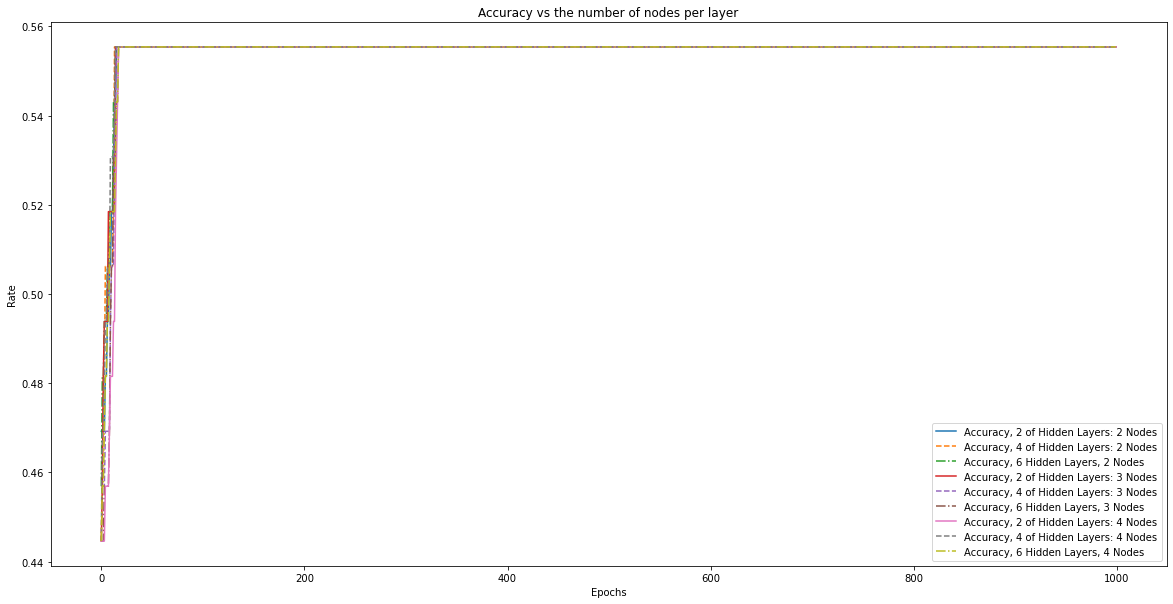

In [13]:
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.plot(acc_nodes_avg[i], linestyle = 'solid', label = 'Accuracy, 2 of Hidden Layers: {} Nodes'.format(i+2))
    plt.plot(acc_nodes_avg[3+i], linestyle = 'dashed', label = 'Accuracy, 4 of Hidden Layers: {} Nodes'.format(i+2))
    plt.plot(acc_nodes_avg[6+i], linestyle = 'dashdot', label = 'Accuracy, 6 Hidden Layers, {} Nodes'.format(i+2))
    
plt.xlabel('Epochs')
plt.ylabel('Rate')
plt.title('Accuracy vs the number of nodes per layer')
plt.legend(loc=4)
plt.show()

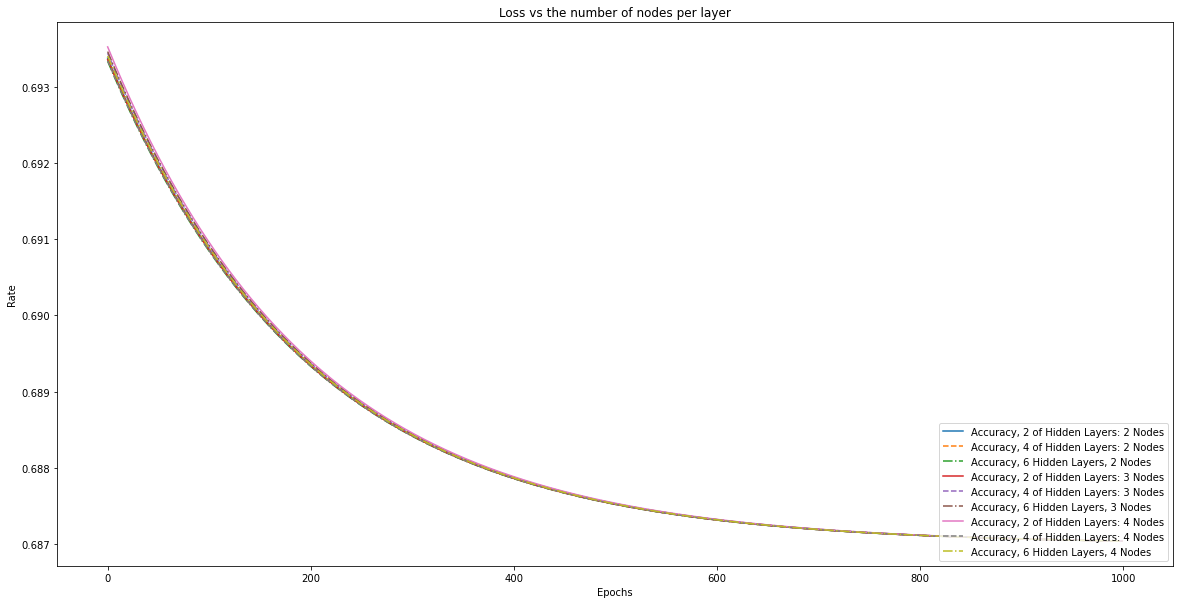

In [14]:
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.plot(loss_nodes_avg[i], linestyle = 'solid', label = 'Accuracy, 2 of Hidden Layers: {} Nodes'.format(i+2))
    plt.plot(loss_nodes_avg[3+i], linestyle = 'dashed', label = 'Accuracy, 4 of Hidden Layers: {} Nodes'.format(i+2))
    plt.plot(loss_nodes_avg[6+i], linestyle = 'dashdot', label = 'Accuracy, 6 Hidden Layers, {} Nodes'.format(i+2))
    
plt.xlabel('Epochs')
plt.ylabel('Rate')
plt.title('Loss vs the number of nodes per layer')
plt.legend(loc=4)
plt.show()